In [1]:
import numpy as np
import healpy as hp
from matplotlib.pyplot import *
import tqdm
# from cmblensplus/wrap/
import curvedsky as cs
# from cmblensplus/utils/
import plottools as pl
import constant as c
import cmb
# others
import local
import tools_cmb
import warnings
warnings.filterwarnings("ignore")

In [2]:
# define parameters
lmax  = 190     # maximum multipole of alm to be generated
nside = 128
mask  = 'lbs4'
l = np.linspace(0,lmax,lmax+1)
fac = l*(l+1)/2/np.pi*c.Tcmb**2
wl = hp.sphtfunc.pixwin(nside,lmax=lmax)
bl = cmb.beam(80.,lmax)

In [3]:
pobj = local.analysis()
cobj = tools_cmb.cmb_map()

In [4]:
M = tools_cmb.prepare_masks(nside=nside)[mask]
#M = hp.ud_grade(hp.read_map('../data/lensing/FG_mask.fits'),nside)
W = M.copy()
#W = cs.utils.apodize(nside, M, 1.)
W2 = np.mean(W**2)
print(W2)

0.3011322021484375


In [7]:
simn = 10
BB0 = np.zeros((simn,lmax+1))
BB1 = np.zeros((simn,lmax+1))
BB2 = np.zeros((simn,lmax+1))
for rlz in tqdm.tqdm(range(1,simn+1)):
    sBlm, rBlm, nBlm = tools_cmb.prepare_obs_Bmap(pobj,cobj,rlz,mask,nside=nside,lmax=lmax,method='bonly')
    BB0[rlz-1] = cs.utils.alm2cl(lmax,sBlm)
    BB1[rlz-1] = cs.utils.alm2cl(lmax,rBlm)
    BB2[rlz-1] = cs.utils.alm2cl(lmax,nBlm)
mBB0 = np.mean(BB0,axis=0)
mBB1 = np.mean(BB1,axis=0)
mBB2 = np.mean(BB2,axis=0)

100%|██████████| 10/10 [05:17<00:00, 31.77s/it]


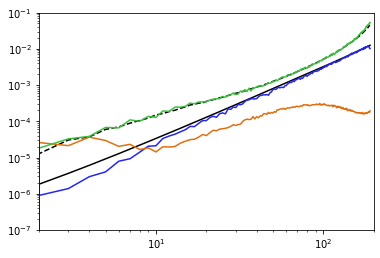

In [8]:
xlim(2,200)
ylim(1e-7,1e-1)
loglog(l,fac*pobj.clfg[:lmax+1],label='noise',color='k',ls='--')
loglog(l,fac*pobj.lcl[2][:lmax+1],label='lensing',color='k',ls='-')
loglog(l,fac*mBB0/W2)
loglog(l,fac*mBB1/W2*0.0046)
loglog(l,fac*mBB2/W2*wl**2)